# **Metode K-Mean**

## **Pengertian Metode K-Mean**


Untuk melakukan pengelompokkan data ada beberapa cara/metode yang dapat digunakan seperti salah satunya yaitu clustering. Metode Clustering dapat
digunakan untuk mengelompokkan suatu data yang memiliki kesamaan antara satu data dengan data yang lainnya. namun dalam prosesnya dan Untuk menunjang keberhasilan proses analisis data, maka diperlukan juga penerapan suatu algoritma. Adapun algoritma yang digunakan pada bab ini yaitu Algoritma K-Mean.

*K-Means Clustering*  adalah teknik pengelompokan data yang memisahkan data ke dalam cluster, mengelompokkan data dengan fitur yang sama bersama-sama dan mengelompokkan data dengan karakteristik yang berbeda ke dalam kelompok yang berbeda dengan centroid sebagai acuannya. Metode k-means membagi data menjadi beberapa kelompok sehingga data dengan karakteristik yang sama berada pada cluster yang sama dan data dengan karakteristik yang berbeda berada pada cluster yang berbeda


## **Manfaat *Claustering***


- Clustering merupakan metode segmentasi data yang sangat berguna dalam prediksi dan analisa masalah bisnis tertentu. Misalnya Segmentasi pasar, marketing dan pemetaan zonasi wilayah.
- Identifikasi obyek dalam bidang berbagai bidang seperti computer vision dan image processing.

Hasil clustering yang baik akan menghasilkan tingkat kesamaan yang tinggi dalam satu kelas dan tingkat kesamaan yang rendah antar kelas. Kesamaan yang dimaksud merupakan pengukuran secaranumeric terhadap dua buah objek. Nilai kesamaan antar kedua objek akan semakin tinggi jika kedua objek yang dibandingkan memiliki kemiripan yang tinggi. Begitu juga dengan sebaliknya. Kualitas hasil clustering sangat bergantung pada metode yang dipakai

## **Inertia (Sum Square error/SSE)**


Dalam konteks algoritma *K-Means Clustering*, *inertia* (Sum Square error/SSE) adalah salah satu metrik evaluasi untuk menilai seberapa baik data dikelompokkan ke dalam klaster serta mengukur jumlah total jarak kuadrat antara setiap titik data dan pusat klaster (centroid) tempat titik tersebut.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Silhouette Analysis adalah metrik evaluasi lain yang lebih baik dari inertia dalam banyak kasus untuk mengevaluasi hasil clustering, seperti pada K-Means, karena mempertimbangkan dua hal sekaligus yaitu:

- Kepadatan dalam klaster

- Jarak antar klaster

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Implementasi dengan menggunakan data Iris**

In [12]:
%pip install pymysql
%pip install psycopg2

## **Mengumpulkan data**

In [13]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-pendata-ahmadsyauqifuady33-3378.c.aivencloud.com",
        user="avnadmin",
        password="AVNS_6qwFNwK5B4vuVyZEVWE",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          55.4         65.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           3.6          1.5           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           6.5          1.3
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           4.7          3.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2          33.8         45.4
 13     Iris-setosa           1.4     

## **Clauster data menggunakan metode k means dengan claster 2,3,4**

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score

# 1. Pastikan kolom 'class' ada dan ubah ke angka sebagai ground truth
if 'class' in df_merged.columns:
    le = LabelEncoder()
    df_merged['class_encoded'] = le.fit_transform(df_merged['class'])  # label ground truth numerik
    y = df_merged['class_encoded']
else:
    raise ValueError("Kolom 'class' tidak ditemukan di df_merged!")

# 2. Ambil fitur numerik dan buang kolom yang tidak diperlukan
columns_to_exclude = ['id', 'class', 'class_encoded', 'jenis']
available_columns_to_drop = [col for col in columns_to_exclude if col in df_merged.columns]

# Ambil hanya kolom numerik untuk fitur (selain label dan non-feature)
X = df_merged.drop(columns=available_columns_to_drop)
X = X.select_dtypes(include=[int, float])

if X.shape[1] == 0:
    raise ValueError("Tidak ada kolom numerik yang bisa digunakan untuk clustering!")

# 3. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Fungsi untuk menjalankan K-Means dan mengevaluasi akurasi
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print("Centroids:")
    print(centroids)
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 5. Jalankan untuk k = 2, 3, 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



Hasil K-Means dengan 2 Klaster:
Centroids:
[[ 2.46612806  2.32264237  2.72978117  2.72231047]
 [-0.176152   -0.16590303 -0.19498437 -0.19445075]]
Akurasi (Adjusted Rand Score): 0.001

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-1.44325238e-01 -1.65148114e-01 -1.94792669e-01 -1.77999415e-01]
 [ 5.09038838e+00  5.99886343e+00  9.33599675e-01  1.43833660e+00]
 [-2.33898739e-03 -1.41913931e-01  4.74627353e+00  3.86891422e+00]]
Akurasi (Adjusted Rand Score): -0.000

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-2.19518567e-01 -1.65915517e-01 -2.06870584e-01 -1.95846495e-01]
 [ 5.09038838e+00  5.99886343e+00  9.33599675e-01  1.43833660e+00]
 [-2.33898739e-03 -1.41913931e-01  4.74627353e+00  3.86891422e+00]
 [ 3.31456790e+00 -1.29847560e-01  3.60791435e-01  6.42966261e-01]]
Akurasi (Adjusted Rand Score): -0.001


## **Visualisasi hasil Claustering**

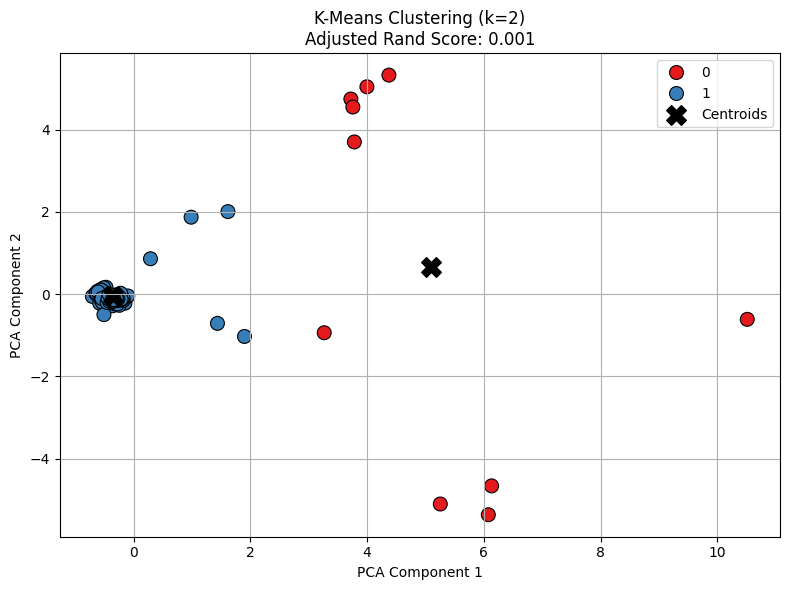

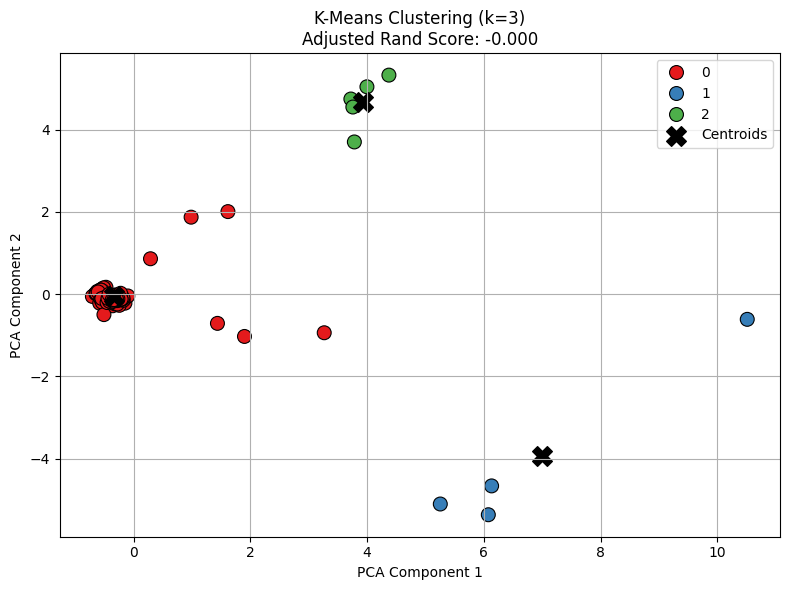

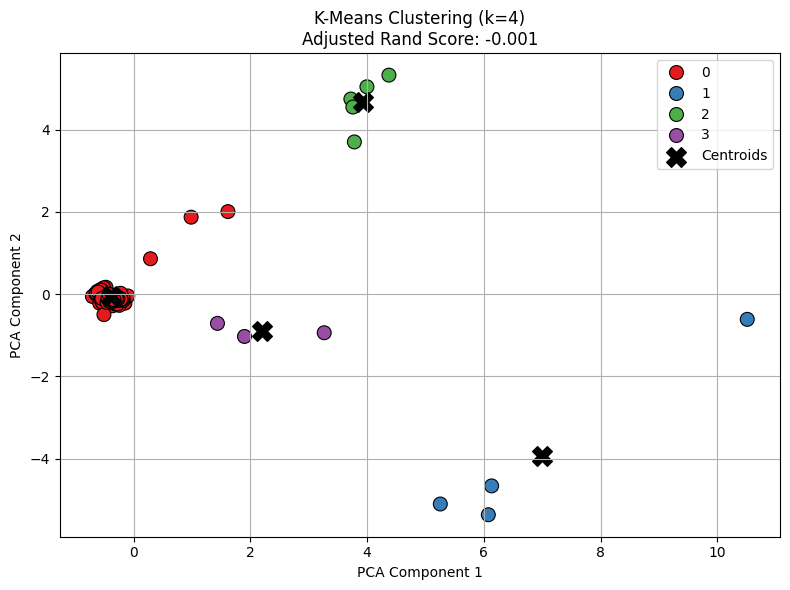

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encode label ground truth
if 'class' in df_merged.columns:
    le = LabelEncoder()
    df_merged['class_encoded'] = le.fit_transform(df_merged['class'])
    y = df_merged['class_encoded']
else:
    raise ValueError("Kolom 'class' tidak ditemukan di df_merged!")

# 2. Ambil hanya fitur numerik
columns_to_exclude = ['id', 'class', 'class_encoded', 'jenis']
available_columns_to_drop = [col for col in columns_to_exclude if col in df_merged.columns]
X = df_merged.drop(columns=available_columns_to_drop)
X = X.select_dtypes(include=[int, float])

if X.shape[1] == 0:
    raise ValueError("Tidak ada kolom numerik yang bisa digunakan untuk clustering!")

# 3. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Fungsi KMeans + visualisasi
def perform_kmeans_plot(X_scaled, X_pca, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    centroids_2d = pca.transform(kmeans.cluster_centers_)
    accuracy = adjusted_rand_score(y, labels)

    # Plot hasil klaster
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=100, edgecolor='k', legend='full')
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title(f"K-Means Clustering (k={k})\nAdjusted Rand Score: {accuracy:.3f}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return labels, accuracy

# 6. Jalankan dan visualisasikan untuk k = 2, 3, 4
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, X_pca, y, k)


## **Menghitung Inertia**

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    # Hitung jarak kuadrat dari tiap data point ke centroid-nya
    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2  # Jarak kuadrat
        inertia += distance  # Tambahkan ke total inertia
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 3. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)  # Prediksi label untuk data
    centroids = kmeans.cluster_centers_   # Ambil posisi centroid

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 4. Jalankan untuk k = 2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[ 2.46612806  2.32264237  2.72978117  2.72231047]
 [-0.176152   -0.16590303 -0.19498437 -0.19445075]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [ 4.08587683  6.25527382 -0.30273304 -0.16166795]), Klaster: 0, Centroid: [2.46612806 2.32264237 2.72978117 2.72231047], Jarak kuadrat: 35.603, Inertia sementara: 35.603
Titik data 2 (Fitur: [ 0.6275169  -0.09968163  3.408857    4.04678073]), Klaster: 0, Centroid: [2.46612806 2.32264237 2.72978117 2.72231047], Jarak kuadrat: 11.464, Inertia sementara: 47.066
Titik data 3 (Fitur: [-0.24124984 -0.14995818 -0.34420332 -0.20931077]), Klaster: 1, Centroid: [-0.176152   -0.16590303 -0.19498437 -0.19445075], Jarak kuadrat: 0.027, Inertia sementara: 47.093
Titik data 4 (Fitur: [-0.4166739  -0.2806772  -0.35457089 -0.22519171]), Klaster: 1, Centroid: [-0.176152   -0.16590303 -0.19498437 -0.19445075], Jarak kuadrat: 0.097, Inertia sementara: 47.191
Titik data 5

## **Visualisasi Menggunakan Metode Elbow**

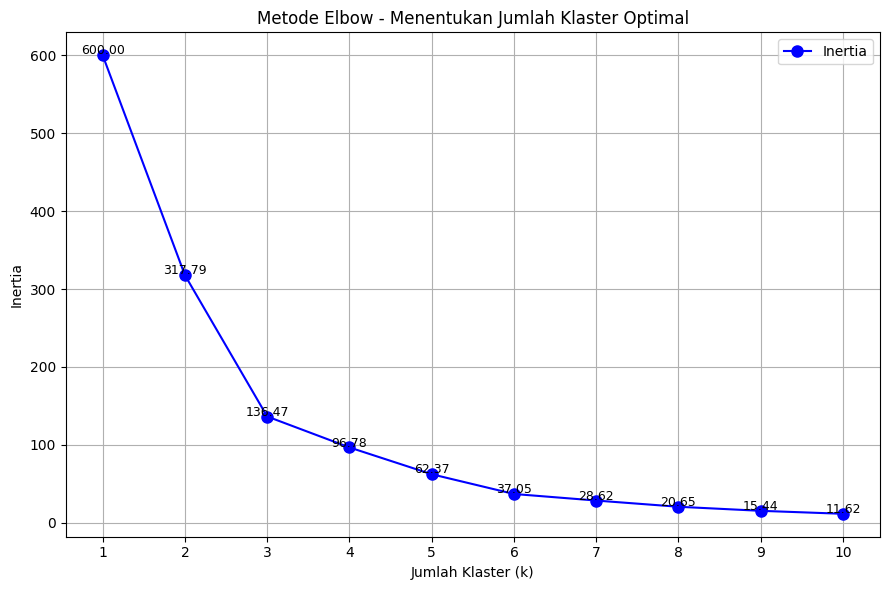

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 3. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


## **Menghitung Silhouette**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[ 2.46612806  2.32264237  2.72978117  2.72231047]
 [-0.176152   -0.16590303 -0.19498437 -0.19445075]]
Silhouette Score untuk 2 klaster: 0.877

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-1.44325238e-01 -1.65148114e-01 -1.94792669e-01 -1.77999415e-01]
 [ 5.09038838e+00  5.99886343e+00  9.33599675e-01  1.43833660e+00]
 [-2.33898739e-03 -1.41913931e-01  4.74627353e+00  3.86891422e+00]]
Silhouette Score untuk 3 klaster: 0.897

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-2.19518567e-01 -1.65915517e-01 -2.06870584e-01 -1.95846495e-01]
 [ 5.09038838e+00  5.99886343e+00  9.33599675e-01  1.43833660e+00]
 [-2.33898739e-03 -1.41913931e-01  4.74627353e+00  3.86891422e+00]
 [ 3.31456790e+00 -1.29847560e-01  3.60791435e-01  6.42966261e-01]]
Silhouette Score untuk 4 klaster: 0.870


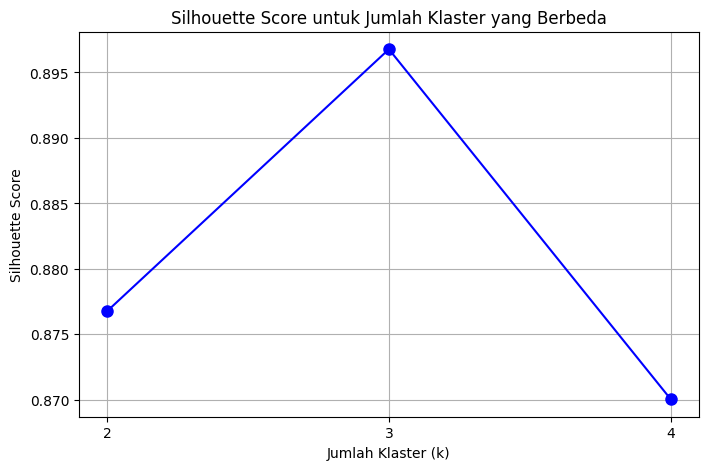

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# --- Asumsi: df_merged sudah didefinisikan sebelumnya dari merge data PostgreSQL & MySQL ---

# 1. Ambil hanya fitur numerik (hindari kolom non-feature)
columns_to_exclude = ['id', 'class', 'class_encoded', 'jenis']
available_columns_to_drop = [col for col in columns_to_exclude if col in df_merged.columns]

X = df_merged.drop(columns=available_columns_to_drop)
X = X.select_dtypes(include=[int, float])

if X.shape[1] == 0:
    raise ValueError("Tidak ada kolom numerik yang tersedia untuk clustering.")

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk K-Means dan Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, labels)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Jalankan dan simpan hasil silhouette score
silhouette_scores = []
for k in [2, 3, 4]:
    silhouette_score_k = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(silhouette_score_k)

# 5. Visualisasi hasil silhouette
plt.figure(figsize=(8, 5))
plt.plot([2, 3, 4], silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks([2, 3, 4])
plt.grid(True)
plt.show()
